# Inverse Fan Beam Transform on P3D Example Data

Each raw scan image is 1024\*384, meaning scan cuboid is 1024\*384\*390, with xyz respectively. As a result, our sinogram data for one slice is an image 1024\*390, of which we have 384 slices.

In [76]:
import numpy as np
import astra
from astra import data2d as d2d
from matplotlib import pyplot as plt

In [77]:
size = (384, 1024)
depth = 2
imgSize = size[0] * size[1] * depth
imgSizeWords = int(imgSize / 2)

In [78]:
real_raw = np.fromfile("ExampleData.mdlp", dtype="uint16")

In [79]:
len(real_raw)/(1024*384)

390.0

## Print All Phases

In [80]:
all_phases = []
for i in range(0, 390):
    ptr = i * imgSizeWords
    img = real_raw[ptr:ptr + imgSizeWords]
    img = img.reshape(size)
    all_phases.append(img)

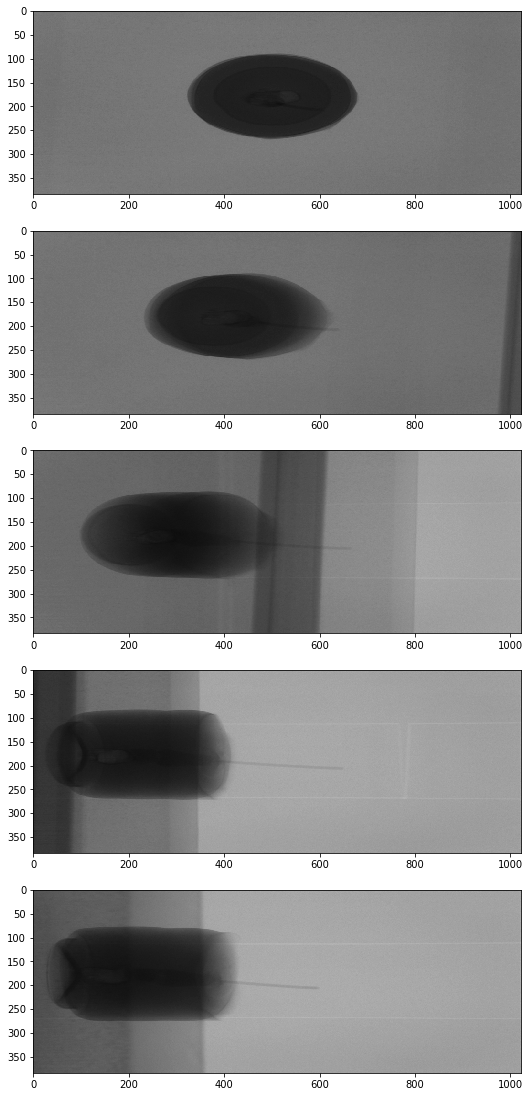

In [81]:
# Prints every 30 phases
fig = plt.figure(figsize=(16, 64))
for i in range(5):
    fig.add_subplot(16, 1, i+1)
    plt.imshow(all_phases[30 * i], cmap = 'gray', vmin=0, vmax=10000)

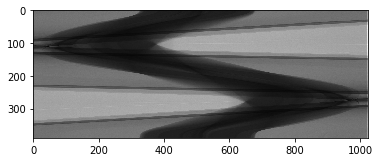

In [82]:
sino = []
for phase in all_phases:
    sino.append(phase[192])
plt.imshow(sino, cmap = 'gray', vmin=0, vmax=10000)

In [83]:
np.array(sino).shape

(390, 1024)

## Astra

In [84]:
proj_geom = astra.create_proj_geom('fanflat', 390, 1024, [1 for i in range(390)], 10, 10)

In [85]:
proj_id = astra.create_projector("strip_fanflat", proj_geom, vol_geom)

In [86]:
sino_id = d2d.create("-sino", proj_geom, np.array(sino))

In [87]:
out = astra.create_backprojection(sino_id, proj_id)

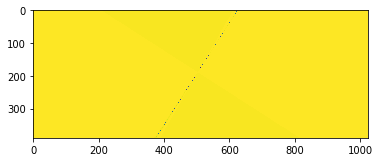

In [88]:
plt.imshow(out[1])

### Method 2

In [89]:
vol_geom = astra.create_vol_geom(390, 1024)

In [90]:
vol_id = d2d.create("-vol", vol_geom)

In [91]:
proj_geom = astra.create_proj_geom('fanflat', 390, 1024, [1 for i in range(390)], 10, 10)

In [92]:
proj_id = astra.create_projector("strip_fanflat", proj_geom, vol_geom)

In [93]:
sino_id = d2d.create("-sino", proj_geom, np.array(sino))

In [94]:
output_id = d2d.create('-vol', vol_geom)
cfg = astra.astra_dict("SIRT")
cfg["ReconstructionDataId"] = vol_id
cfg['ProjectionDataId'] = sino_id 
cfg['ProjectorDataId'] = proj_id
alg_id = astra.algorithm.create(cfg)

Exception: Unable to initialize Algorithm.

In [ ]:
astra.algorithm.run(alg_id, 100) 
rec = astra.data2d.get(rec_id)